<Figure size 432x288 with 0 Axes>

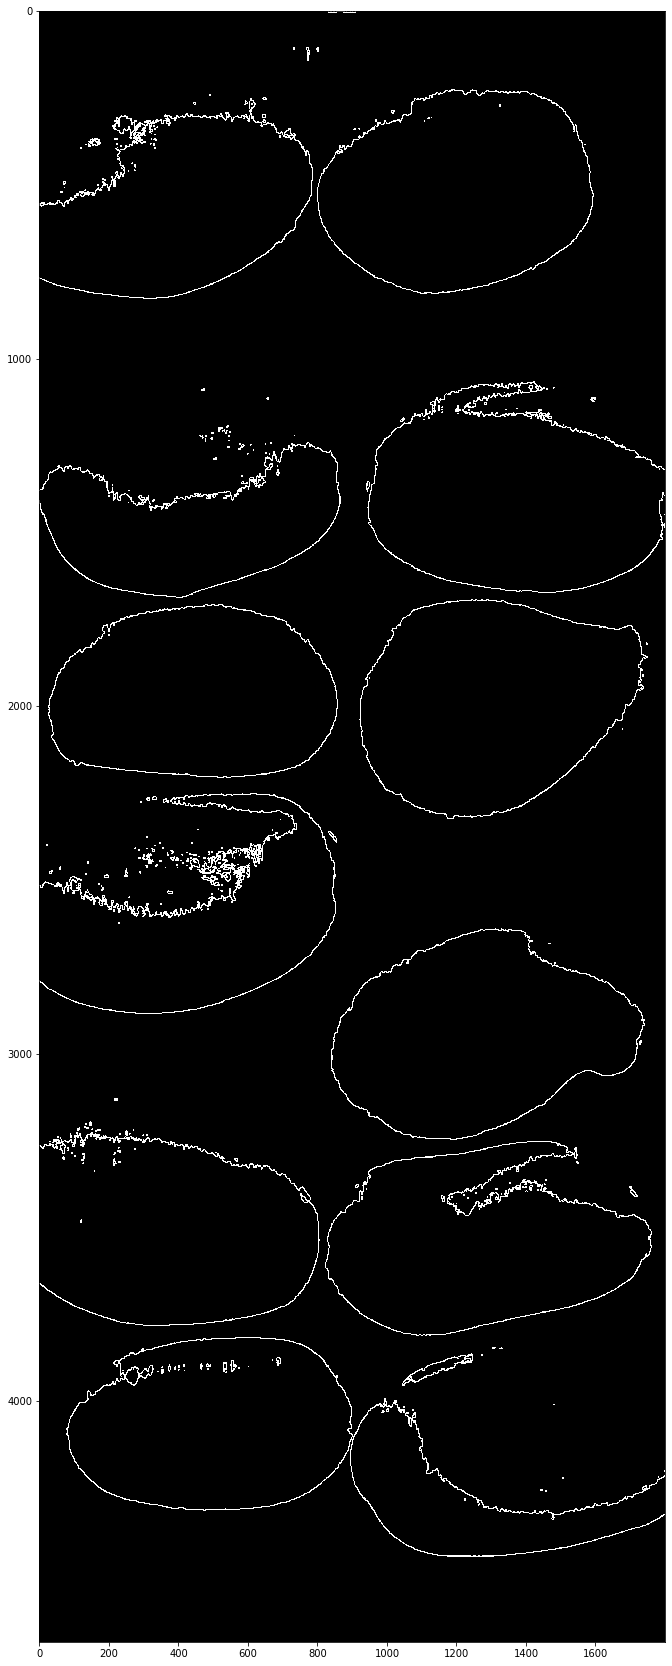

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from plots import plotSpectrum
#from skimage.io import imsave, imread,imshow

#%matplotlib inline
#plt.rcParams['figure.figsize'] = [16, 8]

potatoB1 = sp.open_image("../Normalised/potato_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T153243_raw_rad_nn.hdr")
#potatoPelledB1 = sp.open_image("../Normalised/potatopeeled_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T160546_raw_rad_nn.hdr")
margin = 1200
N,M,bands = potatoB1.shape

potatoB1 = potatoB1[margin:,:,:]
#sp.imshow(potatoB1, figsize = (300,30) ,cmap="gray")
#potatoB1 = potatoB1.read_subimage(np.arange(margin, N, 1),np.arange(0, M, 1))
#sp.imshow(potatoB1, figsize = (300,30) ,cmap="gray")


#N,M,bands = potatoPelledB1.shape
#print(N,M,bands)

#potatoB1_pixel = potatoB1.read_pixel(4100,1200)
#potatoPelledB1_pixel = potatoPelledB1.read_pixel(4100,1200)

#plotSpectrum(potatoB1_pixel)
#plt.figure()
#plotSpectrum(potatoPelledB1_pixel)


potatoB1Band = potatoB1[:,:,170]


#sp.imshow(potatoB1Band, figsize = (300,30) ,cmap="gray")
#plt.figure()

image8bit = (potatoB1Band*256).astype('uint8')

blurred = cv2.GaussianBlur(image8bit, (5, 5), 0)

thresh = cv2.threshold(blurred, np.mean(blurred) , 1, cv2.THRESH_BINARY_INV)[1]  #thresholdblurred[150,900]

kernel = np.ones((3,3),np.uint8)

#edges = cv2.dilate(cv2.Canny(thresh, 0, 1), None)

#dilate = cv2.erode(cv2.dilate(thresh, kernel, iterations=1), kernel, iterations=6)
#sp.imshow(dilate, figsize = (300,30), cmap="gray")
#plt.figure()


#opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)

edges = cv2.dilate(cv2.Canny(thresh, 0, 1), kernel, iterations = 1)


#thresh = cv2.threshold(blurred, , 1, cv2.THRESH_BINARY)[1]
#th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, 13, 2)

sp.imshow(edges, figsize = (300,30), cmap="gray")
plt.figure()



    # Draws contours
#cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)
#cv2.drawContours(image8bit, cnt[-8:], -1, (255), 10)
#sp.imshow(image8bit, figsize = (300,30), cmap="gray")
#plt.figure()




#sp.imshow(edges, figsize = (300,30), cmap="gray")
#plt.figure()





#kernel = np.ones((5,5),np.uint8)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 5)

#sp.imshow(closing, figsize = (300,30), cmap="gray")



#laplacian = cv2.Laplacian(potatoB1Band,cv2.CV_8U,ksize=9)
#plt.imshow(laplacian, figsize = (300,30) ,cmap="gray")
#plt.figure()



